In [2]:
import numpy as np
from numpy.linalg import cholesky
import matplotlib.pyplot as plt
from math import pi

N=10**3
J = np.zeros(N-1)
phi = np.zeros(N-1)
for i in range(1,N):
    beta = np.arcsin(np.sqrt(i/N))
    J[i-1] = np.floor((pi/2-beta)/(2*beta)) + 1
    while np.sin(pi/(J[i-1]+6)) > np.sqrt(i/N):
        J[i-1] = J[i-1]+1
    phi[i-1] = 2*np.arcsin(np.sin(pi/(J[i-1]+6))/(np.sqrt(i/N)))
    

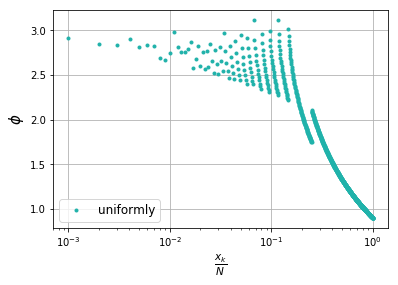

In [4]:
from pylab import *
x = np.linspace(1/N,1,N-1)
plt.xscale('log')

plt.plot(x, phi,'.',color='#20B2AA',label='uniformly')
#plt.plot(x, J, color='#FF4500',label='times')
plt.xscale('log')
xlabel(r'$\frac{x_k}{N}$',fontsize=15)
ylabel(r'$\phi$',fontsize=15)

plt.legend(fontsize=12)
plt.grid(True)
plt.show()

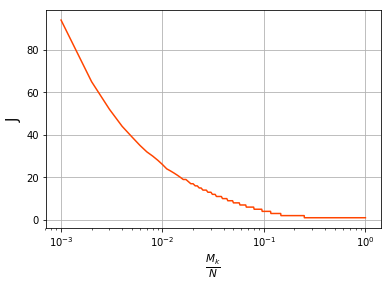

In [5]:
from pylab import *
x = np.linspace(1/N,1,N-1)
plt.plot(x, J, '',color='#FF4500',label='uniformly')
plt.xscale('log')
xlabel(r'$\frac{M_k}{N}$',fontsize=15)
ylabel(r'J',fontsize=15)

#plt.legend(fontsize=12)
plt.grid(True)
plt.show()

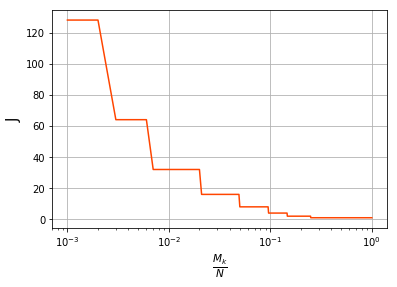

In [6]:
for i in range(N-1):
    if J[i]>2**6 and J[i]<=2**7:
        J[i] = 2**7
    elif J[i]>2**5 and J[i]<=2**6:
        J[i] = 2**6
    elif J[i]>2**4 and J[i]<=2**5:
        J[i] = 2**5
    elif J[i]>2**3 and J[i]<=2**4:
        J[i] = 2**4
    elif J[i]>2**2 and J[i]<=2**3:
        J[i] = 2**3
    elif J[i]>2**1 and J[i]<=2**2:
        J[i] = 2**2
    elif J[i]>2**0 and J[i]<=2**1:
        J[i] = 2**1
    elif J[i]<=2**0:
        J[i] = 2**0
x = np.linspace(1/N,1,N-1)
plt.plot(x, J, '',color='#FF4500',label='uniformly')
plt.xscale('log')
xlabel(r'$\frac{M_k}{N}$',fontsize=15)
ylabel(r'J',fontsize=15)

#plt.legend(fontsize=12)
plt.grid(True)
plt.show()

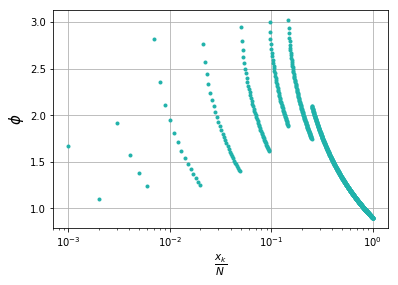

In [7]:
for i in range(1,N):
     phi[i-1] = 2*np.arcsin(np.sin(pi/(J[i-1]+6))/(np.sqrt(i/N)))
x = np.linspace(1/N,1,N-1)
plt.xscale('log')

plt.plot(x, phi,'.',color='#20B2AA',label='uniformly')
#plt.plot(x, J, color='#FF4500',label='times')
plt.xscale('log')
xlabel(r'$\frac{x_k}{N}$',fontsize=15)
ylabel(r'$\phi$',fontsize=15)

#plt.legend(fontsize=12)
plt.grid(True)
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


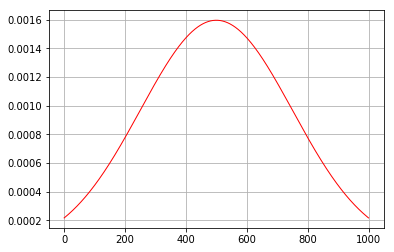

[   0.    1.    2. ...  998.  999. 1000.]


In [9]:
#正态函数
u = N/2   # 均值μ
#u01 = -2
sig = N/4 # 标准差δ
 
x = np.linspace(u - 2*sig, u + 2*sig, 2*2*sig+1)
y_sig = np.exp(-(x - u) ** 2 /(2* sig **2))/(math.sqrt(2*math.pi)*sig)

plt.plot(x, y_sig, "r-", linewidth=1)
plt.grid(True)
plt.show()


In [10]:
print(sum(y_sig))
print(y_sig[1])

0.9547154120179497
0.0002176967647096374


In [13]:
rk=np.zeros(N-1)
t = 0.954499461491455
for j in range(N-1):
    for i in range(1,N):
        if sum(y_sig[0:i-1])/t > j/N:
            rk[j]=i-1
            break
print(rk[0:30])

[ 1.  5.  9. 13. 17. 21. 25. 28. 32. 35. 39. 42. 45. 48. 51. 54. 57. 60.
 63. 66. 69. 71. 74. 76. 79. 82. 84. 86. 89. 91.]


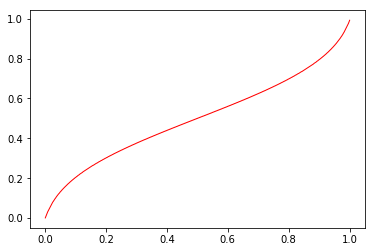

In [14]:
x = np.linspace(1/N,1,N-1)
plt.plot(x, rk/N, "r-", linewidth=1)


In [15]:
J_1 = np.zeros(N-1)
phi_1 = np.zeros(N-1)
for i in range(1,N):
    beta = np.arcsin(np.sqrt(rk[i-1]/N))
    J_1[i-1] = np.floor((pi/2-beta)/(2*beta)) + 1
    while np.sin(pi/(J_1[i-1]+6)) > np.sqrt(rk[i-1]/N):
        J_1[i-1] = J_1[i-1]+1
    phi_1[i-1] = 2*np.arcsin(np.sin(pi/(J_1[i-1]+6))/(np.sqrt(rk[i-1]/N)))
print(phi_1)


[2.94546495 3.02404752 2.78554804 ... 0.90521886 0.90329536 0.90138412]


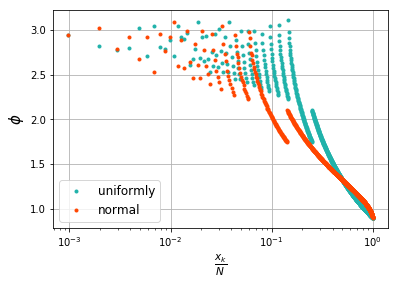

In [25]:
x = np.linspace(1/N,1,N-1)

plt.plot(x, phi,'.',color='#20B2AA',label='uniformly')
plt.plot(x, phi_1,'.',color='#FF4500',label='normal')
#plt.plot(x, J, color='#FF4500',label='times')
plt.xscale('log')
xlabel(r'$\frac{x_k}{N}$',fontsize=15)
ylabel(r'$\phi$',fontsize=15)

plt.legend(fontsize=12)
plt.grid(True)
plt.show()

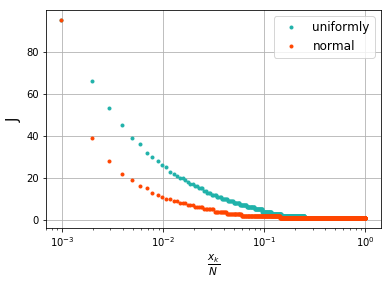

In [17]:
plt.plot(x, J, '.',color='#20B2AA',label='uniformly')
plt.plot(x, J_1, '.',color='#FF4500',label='normal')
plt.xscale('log')
xlabel(r'$\frac{x_k}{N}$',fontsize=15)
ylabel('J',fontsize=15)

plt.legend(fontsize=12)
plt.grid(True)
plt.show()

[7.88860905e-31 7.88860905e-29 3.90486148e-27 1.27558808e-25
 3.09330110e-24 5.93913812e-23 9.40363535e-22 1.26277389e-20
 1.46797465e-19 1.50059631e-18 1.36554264e-17 1.11726216e-16
 8.28636101e-16 5.60922899e-15 3.48573516e-14 1.99848816e-13
 1.06169683e-12 5.24603142e-12 2.41900338e-11 1.04399093e-10
 4.22816327e-10 1.61072886e-09 5.78398092e-09 1.96152396e-08
 6.29322272e-08 1.91313971e-07 5.51867223e-07 1.51252498e-06
 3.94336870e-06 9.79043264e-06 2.31706906e-05 5.23209142e-05
 1.12816971e-04 2.32471335e-04 4.58105277e-04 8.63855666e-04
 1.55973940e-03 2.69792760e-03 4.47287998e-03 7.11073227e-03
 1.08438667e-02 1.58690732e-02 2.22922695e-02 3.00686426e-02
 3.89525598e-02 4.84742966e-02 5.79583981e-02 6.65905000e-02
 7.35270104e-02 7.80286641e-02 7.95892374e-02 7.80286641e-02
 7.35270104e-02 6.65905000e-02 5.79583981e-02 4.84742966e-02
 3.89525598e-02 3.00686426e-02 2.22922695e-02 1.58690732e-02
 1.08438667e-02 7.11073227e-03 4.47287998e-03 2.69792760e-03
 1.55973940e-03 8.638556

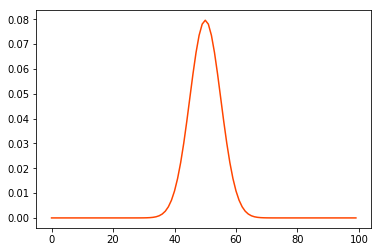

In [45]:
from scipy import stats
p = 0.5
n = 100
k = np.arange(0,100)
y = stats.binom.pmf(k,n,p)
print(y)
plt.plot(k,y,color = '#FF4500')

In [ ]:
import numpy as np
G = [-np.exp(i*phi)*(1+(np.exp(i*phi)-1))*np.sin(beta)**2]